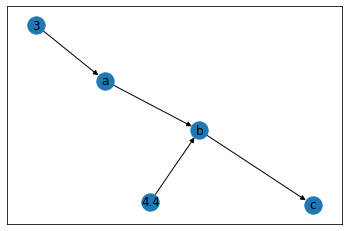

In [4]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
graph = nx.DiGraph()

s = """
a = 3
b = a
c = b
b = 4.4
"""

sa = ast.parse(s)
for a in sa.body:
    if a.__class__.__name__ == 'Assign':
        graph.add_node(a.targets[0].id)
        if a.value.__class__.__name__ == 'Name':
            graph.add_node(a.value.id)
            graph.add_edge(a.value.id, a.targets[0].id)
        elif a.value.__class__.__name__ == 'Constant':
            graph.add_node(a.value.value)
            graph.add_edge(a.value.value, a.targets[0].id)
            
nx.draw_networkx(graph)

In [5]:
nx.ancestors(graph, 'b')

{3, 4.4, 'a'}

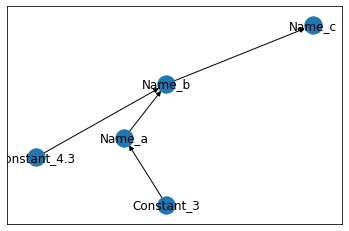

In [6]:
graph = nx.DiGraph()

s = """
a = 3
b = a
c = b
b = 4.3
"""

sa = ast.parse(s)
for a in sa.body:
    if a.__class__.__name__ == 'Assign':
        for t in a.targets:
            graph.add_nodes_from([
                (f'{t.__class__.__name__}_{t.id}', {'value': t})
            ])
            parent_label = a.value.__class__.__name__ + '_'
            if hasattr(a.value, 'value'):
                parent_label += str(a.value.value)
            elif hasattr(a.value, 'id'):
                parent_label += a.value.id
            graph.add_nodes_from([
                (parent_label, {'value': a.value})
            ])
            graph.add_edge(parent_label, f'{t.__class__.__name__}_{t.id}')

nx.draw_networkx(graph)
print(graph.nodes['Name_a']['value'])

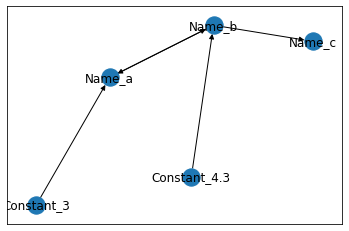

In [1]:
from constraint_graph import ConstraintGraph
import networkx as nx
import ast

s = """
a = 3
b = a
c = b
b = 4.3
if b == 4.3:
    a = b
else:
    c = b
"""
sa = ast.parse(s)

cg = ConstraintGraph()
cg.dispatch(sa)
nx.draw_networkx(cg.g)

In [2]:
nx.ancestors(cg.g, 'Name_a')

{'Constant_3', 'Constant_4.3', 'Name_b'}

In [8]:
for n in cg.g.predecessors('Name_a'):
    print(n)

Constant_3
Name_b


In [2]:
print(cg.get_types('Name_a'))

['float', 'int']


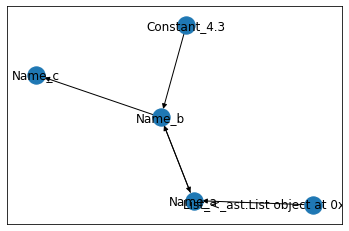

In [1]:
from constraint_graph import ConstraintGraph
import networkx as nx
import ast

s = """
a = [3, 3.14]
b = a
c = b
b = 4.3
if b == 4.3:
    a = b
else:
    c = b
"""
sa = ast.parse(s)

cg = ConstraintGraph()
cg.dispatch(sa)
nx.draw_networkx(cg.g)

In [2]:
print(cg.get_types('Name_a'))

['List[float]', 'float']


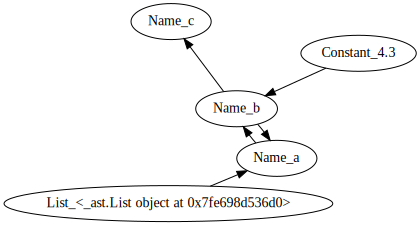

In [8]:
from IPython.display import SVG, display
ag = nx.nx_agraph.to_agraph(cg.g)
display(SVG(ag.draw(prog='fdp', format='svg')))